In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# File dec
file = "../psliceout1.dat"
# file = "../psliceout_dm1e-2_c_br_n_5E14-5E13.dat"

# Read in data
print("Reading data & converting to np array.", flush=True)
data = pd.read_csv(file, sep='\s+', index_col=0, names=['x', 'y', 'z', 'vx', 'vy', 'vz', 'size'], header=None)

Reading data & converting to np array.


<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_2052681/724683843.py:7: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv(file, sep='\s+', index_col=0, names=['x', 'y', 'z', 'vx', 'vy', 'vz', 'size'], header=None)


In [3]:
import matplotlib
def vector_to_rgb(angle, absolute):
    """Get the rgb value for the given `angle` and the `absolute` value

    Parameters
    ----------
    angle : float
        The angle in radians
    absolute : float
        The absolute value of the gradient
    
    Returns
    -------
    array_like
        The rgb value as a tuple with values [0..1]
    """
    global max_abs

    # normalize angle
    angle = angle % (2 * np.pi)
    if angle < 0:
        angle += 2 * np.pi

    return matplotlib.colors.hsv_to_rgb((angle / 2 / np.pi, 
                                         absolute / max_abs, 
                                         absolute / max_abs))

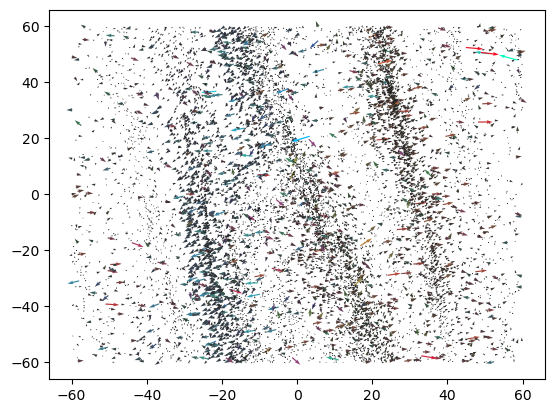

In [5]:
# Top-down 2D vector field
fig, ax = plt.subplots()

f = 1000
x = data['x'][::f]
y = data['y'][::f]

u = data['vx'][::f]
v = data['vy'][::f]

angles = np.array(np.arctan2(v, u))
lengths = np.array(np.sqrt(np.square(u) + np.square(v)))

max_abs = np.max(lengths)
c = np.array(list(map(vector_to_rgb, angles.flatten(), lengths.flatten())))

plt.quiver(x, y, u, v, color=c)
plt.show()

In [ ]:
# 3D vector field
fig, ax = plt.figure(subplot_kw=dict(projection='3d'))

x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.8))

u = data['vx']
v = data['vy']
w = data['vz']

ax.quiver(x, y, z, u, v, w, length=0.1, color = 'black')

plt.show()